## Analise de Dados com Pandas - dataset kc_house_data.csv

### Perguntas:
- [x]  1) Quantas casas tem 1 quarto? 
- [x]  2) Quantas casas tem mais de 1 andar?
- [X]  3) Quantas casas estao em boas condicoes?
- [x]  4) Quantos quartos, em media, as casas possuem?
- [x]  5) Qual o preco medio das casas?
- [x]  6) Qual o desvio padrao do preco?
- [ ]  7) Existem casa com precos outlier?
- [x]  8) Quais sao os 1Q e 3Q dos precos?
- [ ]  9) Qual a data do imovel mais antigo no portfolio?
- [x]  10)Quantos imoveis possuem o numero maximo de andares?
- [x]  11)Criar uma classificacao para os imoveis, separando-os em baixo e alto padrao, de acordo com o preco. 
Acima de 540.000 Alto padrao.
Abaixo ou Igual a 540.000 Baixo padrao.
- [ ]  12) Gostaria de um relatorio ordenado pelo preco e contento as seguintes informacoes:
- [ ]  (id do imovel, data que o imovel ficou disponivel para compra, o numero de quartos, o tamanho total do terreno, preco, classificao do imovel (alto e baixo padrao)
- [ ]  13) Gostaria de um Mapa indicando onde as casas estao localizadas geograficamente.

In [2]:
import pandas as pd

In [3]:
arquivo = 'kc_house_data.csv'

In [4]:
df = pd.read_csv(arquivo, sep=',' ,header=0)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
import pandas_profiling

In [10]:
profile = pandas_profiling.ProfileReport(df)

In [11]:
profile.to_file("report.html")

In [28]:
df[df['bedrooms']==1].count()
# quantidade de casas com 1 quarto

id               199
date             199
price            199
bedrooms         199
bathrooms        199
sqft_living      199
sqft_lot         199
floors           199
waterfront       199
view             199
condition        199
grade            199
sqft_above       199
sqft_basement    199
yr_built         199
yr_renovated     199
zipcode          199
lat              199
long             199
sqft_living15    199
sqft_lot15       199
dtype: int64

In [20]:
pd.value_counts(df['floors']>1)
# quantidade de casas com mais de 1 andar

True     10933
False    10680
Name: floors, dtype: int64

In [26]:
pd.value_counts(df['condition']==5)
# quantidade de casas em boas condicoes

False    19912
True      1701
Name: condition, dtype: int64

In [40]:
df.bedrooms.mean()

3.37084162309721

In [41]:
df.price.mean()

540088.1417665294

In [43]:
df.price.quantile

<bound method Series.quantile of 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64>

In [32]:
#funcao que classifica o padrao dos imoveis.
def standart(i):
    if i > 540000:
        return 'Alto Padrao'
    elif i <= 540000:
        return 'Baixo Padrao'

In [33]:
df['cat_imovel'] = df['price'].apply(standart)

In [37]:
df['cat_imovel'].head(10)

0    Baixo Padrao
1    Baixo Padrao
2    Baixo Padrao
3     Alto Padrao
4    Baixo Padrao
5     Alto Padrao
6    Baixo Padrao
7    Baixo Padrao
8    Baixo Padrao
9    Baixo Padrao
Name: cat_imovel, dtype: object

In [35]:
pd.value_counts(df['cat_imovel'])

Baixo Padrao    13694
Alto Padrao      7919
Name: cat_imovel, dtype: int64

In [6]:
df['price'].std()

258455207.66149613

In [11]:
df.price.describe()

count    2.161300e+04
mean     4.133842e+07
std      2.584552e+08
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      6.885000e+09
Name: price, dtype: float64

<IPython.core.display.Javascript object>


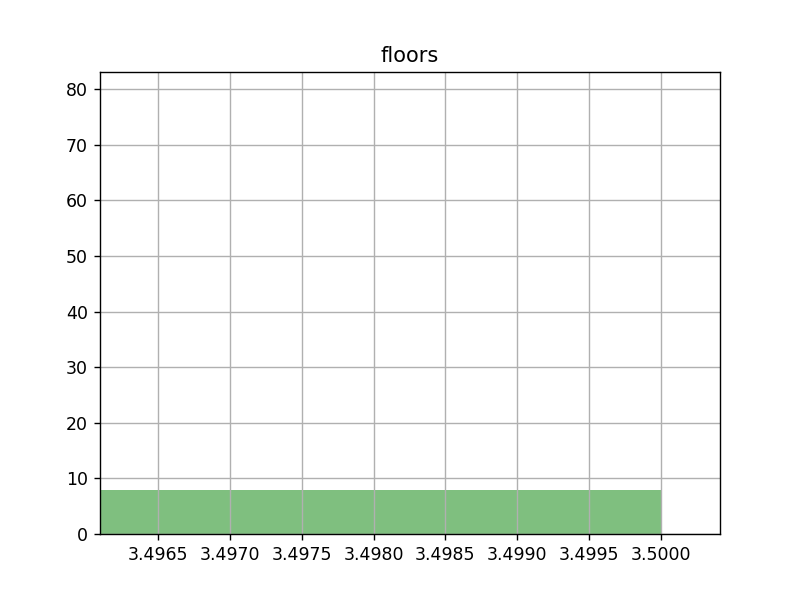

array([[<AxesSubplot:title={'center':'floors'}>]], dtype=object)

In [28]:
%matplotlib notebook
df[['floors']].hist(bins=25, alpha=0.5, color='Green')

In [31]:
pd.value_counts(df['floors']==3.5)

False    21605
True         8
Name: floors, dtype: int64